Immer noch ziemlich nutzlos aber diesmal mit XKCD-Eyecandy. [Bokeh](http://bokeh.pydata.org/) ist ja ganz schön, braucht aber eine ziemlich große JS-Komponente die immer geladen werden muss. Mit [matplotlib](http://matplotlib.org/) kann man statische Grafen zeichnen und mit `%matplotlib notebook` vorher einen Auschnitt wählen.

Ich wollte mal schauen wie sich die Ratingverläufe der Staffeln einer Serie entfalten. Eventuell kann man ja ein daramaturgischen Verlauf erkennen. Ich als jemand der selber keine Ratings abgibt. Alles befindet sich doch ziemlich auf einem Level.

In [1]:
import pandas as pd
import matplotlib
import numpy as np
from trakt.tv import TVShow

Nach dem import der Libs führen wir folgendes Jupyter-Magic aus um die erzeugten Plots im Notebook noch leicht anpassen zu könne.

In [2]:
%matplotlib notebook

Wir aktivieren die XKCD-Style-Plots:

In [3]:
matplotlib.pyplot.xkcd()

Nun kommt die Funktion die alle Daten einsammelt und ausgibt:

In [4]:
def season_ratings(name):
    tv_show = TVShow(name)
    
    data = {}
    for season in tv_show.seasons:
    
        if season.season == 0:
            continue
    
        ratings = []
        for episode in season.episodes:
            ratings.append(episode.rating)
    
        data[season.season] = pd.Series(ratings)

    df = pd.DataFrame(data)
    df.plot(colormap=matplotlib.cm.Accent)

## Beispiele

<IPython.core.display.Javascript object>


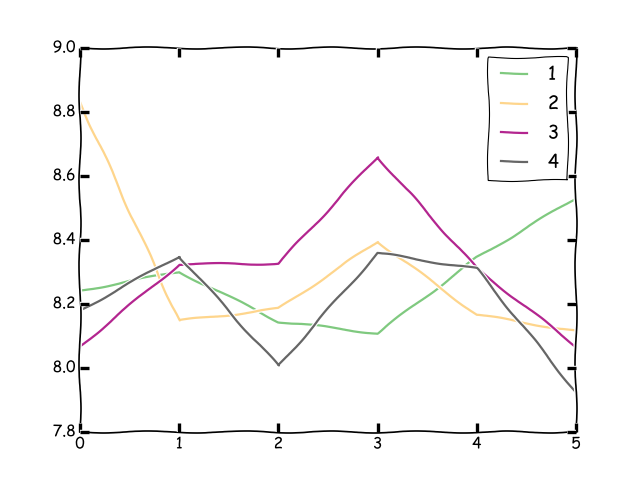

In [5]:
season_ratings('The IT-Crowd')

<IPython.core.display.Javascript object>


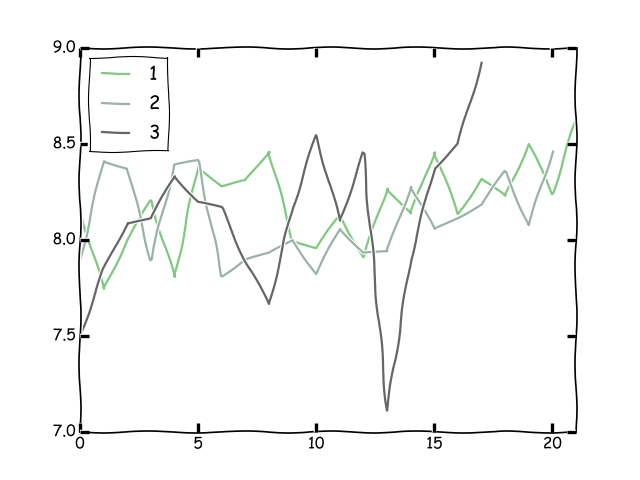

In [6]:
season_ratings('Roswell')

<IPython.core.display.Javascript object>


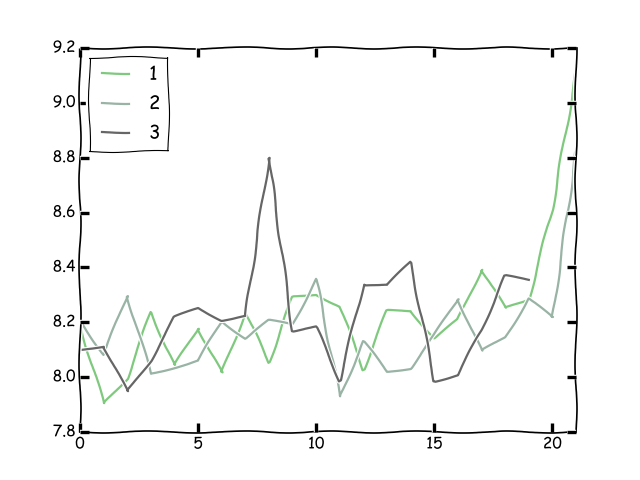

In [7]:
season_ratings('Veronica Mars')

<IPython.core.display.Javascript object>


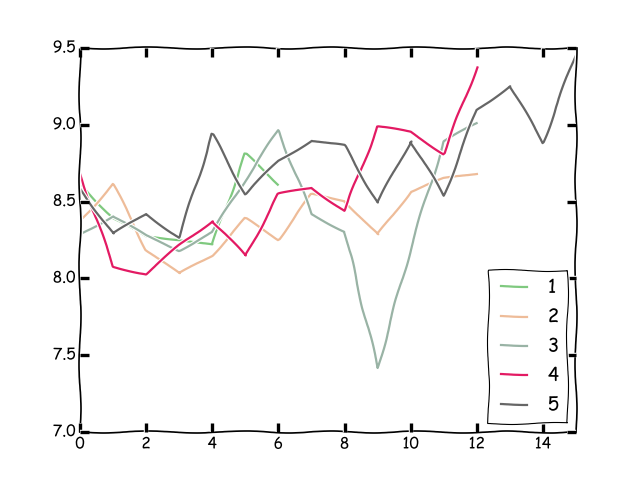

In [8]:
season_ratings('Breaking Bad')

<IPython.core.display.Javascript object>


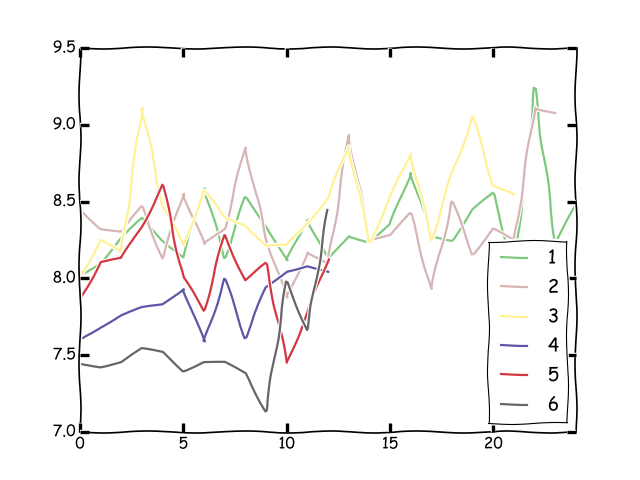

In [9]:
season_ratings('Community')

## Ratingverläufe unterschiedlicher Serien

Nun lassen wir mal ein paar Serien gegeneinander antreten. Dabei betrachten wir immer alle Episoden aller Staffeln.

In [12]:
def series_ratings(series):
    data = {}
    
    for serie in series:
        
        show = TVShow(serie)
        
        ratings = []
        for season in show.seasons:
            
            if season.season == 0:
                continue
            
            for episode in season.episodes:
                ratings.append(episode.rating)
        
        data[serie] = pd.Series(ratings)
        
    df = pd.DataFrame(data)
    df.plot(colormap=matplotlib.cm.Accent)

### Beispiel

<IPython.core.display.Javascript object>


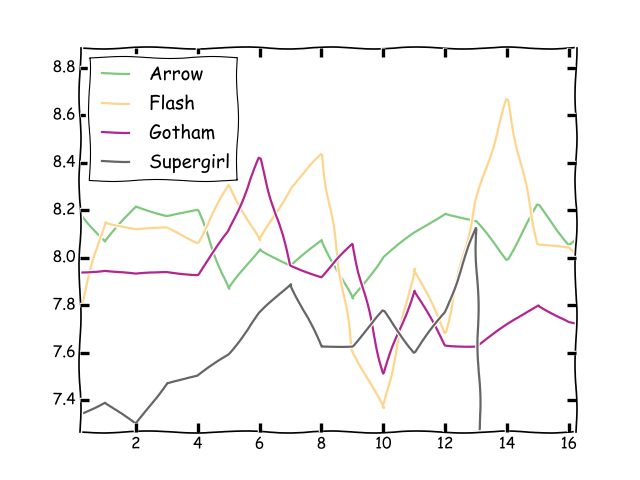

In [13]:
series_ratings(['Gotham', 'Flash', 'Arrow', 'Supergirl'])

Mir ist gerade nichts Besseres eingefallen. Es müssen ja in irgendeinen Sinn vergleichbare Serien sein. Da habe ich mir mal die vier aktuellen DC-Serien angeschaut. Da Arrow schon einige Episoden mehr hat, habe ich den Plot angepasst und hinten abgeschnitten. Glaubt man den Ratings, hätte ich Supergirl doch mehr Chancen als zwei Folgen geben sollen. War in den ersten Folgen einfach zu glatt gebügelt.